In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
W = [16.04276, 31.9988, 44.0095, 18.01528]

In [2]:
#f = h5py.File('/Users/yizhouqian/Dropbox/PSAAP/Case1/Jet_Ignition/data/sample1/fluid_iter0000004400/0,0,0-501,251,0.hdf', 'r')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
m = 624
mass = np.zeros(m)
temperature = np.zeros(m)
XO2 = np.zeros(m)
XCH4 = np.zeros(m)
XH20 = np.zeros(m)
XCO2 = np.zeros(m)
pressure = np.zeros(m)
min_dot = np.zeros(m)
mout_dot = np.zeros(m)
tin_dot = np.zeros(m)
tout_dot = np.zeros(m)
start = 0
end = 252
Yin = np.zeros((m, 4))
Yout = np.zeros((m, 4))
for i in range(m):
    if (i < 100):
        f = h5py.File('/Users/yizhouqian/Dropbox/PSAAP/test_dir/Jet_Ignition_Torch/data/sample0/fluid_iter000000' + "{:02d}".format(i) + '00/0,0,0-751,251,0.hdf', 'r')
    else:
        f = h5py.File('/Users/yizhouqian/Dropbox/PSAAP/test_dir/Jet_Ignition_Torch/data/sample0/fluid_iter00000' + "{:02d}".format(i) + '00/0,0,0-751,251,0.hdf', 'r')
    cells = f['cellWidth'][0, :,:]
    volumes = cells[:, :, 1] * cells[:, :, 2]  
    volumes_3d = cells[:, :, 1] * cells[:,:,2] * cells[:,:,0] 
    mass[i] = np.sum(f['rho'][0,:,:] * volumes_3d)
    temperature[i] = np.sum(f['temperature'][0,:,:] * volumes) / np.sum(volumes)
    pressure[i] = np.sum(f['pressure'][0,:,:] * volumes) / np.sum(volumes)
    mass_frac = (f['MolarFracs'][0, :, :][:, :, :] * W) / np.reshape(np.sum(f['MolarFracs'][0, :, :][:, :, :] * W, axis = 2), (252, 752, 1))
    XO2[i] = np.sum(mass_frac[:, :, 1] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    XCH4[i] = np.sum(mass_frac[:, :, 0] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    XH20[i] = np.sum(mass_frac[:, :, 3] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    XCO2[i] = np.sum(mass_frac[:, :, 2] * f['rho'][0,:,:] * volumes_3d) / np.sum(f['rho'][0,:,:] * volumes_3d)
    v = f['velocity'][0,:,:]
    min_dot[i] = np.sum(f['rho'][0,start:end,0] * volumes[start:end,0] * v[start:end,0,0])
    mout_dot[i] = np.sum(f['rho'][0, :, -1] * volumes[:, -1] * v[:, -1, 0])
    tin_dot[i] = np.sum(f['temperature'][0,start:end,0] * volumes[start:end,0] * v[start:end,0,0])
    tout_dot[i] = np.sum(f['temperature'][0, :, -1] * volumes[:, -1] * v[:, -1, 0])
    mass_frac_in = np.sum((mass_frac[start:end, 0] * np.reshape(f['rho'][0,start:end,0] * volumes[start:end,0] * v[start:end,0,0], (252, 1))), axis = 0)
    Yin[i, :] = mass_frac_in / np.sum(f['rho'][0,start:end,0] * volumes[start:end,0] * v[start:end,0,0])
    mass_frac_out = np.sum((mass_frac[start:end, -1] * np.reshape(f['rho'][0,start:end,-1] * volumes[start:end, -1] * v[start:end,-1,0], (252, 1))), axis = 0)
    Yout[i, :] = mass_frac_out / np.sum(f['rho'][0,start:end,-1] * volumes[start:end,-1] * v[start:end,-1,0])

In [3]:
Yt = np.zeros((4, 624))
Yt[1, :] = XO2
Yt[0, :] = XCH4
Yt[3, :] = XH20
Yt[2, :] = XCO2

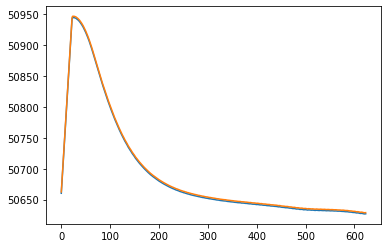

In [6]:
plt.plot(np.sum(mass * Yt / np.reshape(W, (4,1)), axis = 0) * 8314.4621 * temperature / np.sum(volumes_3d))
plt.plot(pressure)

In [7]:
min_accu = np.zeros(m)
mout_accu = np.zeros(m)
tin_accu = np.zeros(m)
tout_accu = np.zeros(m)
delta_t = 2.230011e-06
for i in range(m - 1):
    min_accu[i + 1] = min_accu[i] + min_dot[i] * delta_t
    mout_accu[i + 1] = mout_accu[i] + mout_dot[i] * delta_t 
    tin_accu[i + 1] = tin_accu[i] + tin_dot[i] * delta_t
    tout_accu[i + 1] = tout_accu[i] + tout_dot[i] * delta_t

Text(0, 0.5, 'Total Mass')

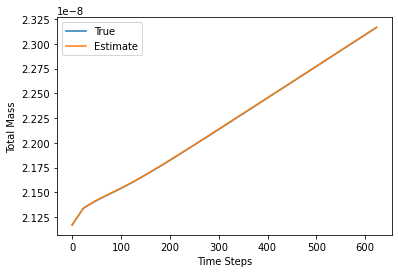

In [8]:
plt.plot(mass, label = 'True')
plt.plot(mass[0] + (min_accu - mout_accu), label = 'Estimate')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Total Mass')

In [9]:
np.save('min_dot.npy', min_dot)

In [10]:
np.save('mout_dot.npy', mout_dot)

In [11]:
np.save('temperature.npy', temperature)

In [12]:
np.save('pressure.npy', pressure)

In [13]:
np.save('xo2.npy', XO2)
np.save('xch4.npy', XCH4)
np.save('total_rho.npy', mass)